## Reciprocal Lattices - FCC, BCC

K. Makulowich September 7, 2020 University of Toronto For technical issues: k.makulowich@mail.utoronto.ca

*Please view the 2. Reciprocal Space notebook before visiting this one. 

We can now apply our better understanding of the relationship between real space and reciprocal space to familiar crystal structure. In this module, we will construct the reciprocal lattice for the FCC and the BCC crystal.

First, we will re-construct the real crystal structure object exactly as we did in the Crystal Structure module. The code is initially set up for the FCC lattice exactly as in the Crystal Structure module. As an exercise you can modify it for the BCC crystal structure. 

In [1]:
#Import statements
from pymatgen import Structure, Lattice
import numpy as np
import nglview as ngl
import MSE430Funcs.CrysStrucFuncs as csfunc
import MSE430Funcs.RLfuncs as rl
#Set the lattice parameter, a
    #Default unit is Angstrom
    #Ex. For Ni, a = 3.49A
# ***==================***
a1=3.49
# ***==================***

#Construct the lattice by passing the lattice vectors the lattice function
    #This function will return the coefficients of the lattice vectors suitable to 
    #build a structure object
# *** =========================================================== ****
prim_vecs1 = [[1/2*a1, 1/2*a1, 0], [0, 1/2*a1, 1/2*a1], [1/2*a1, 0, 1/2*a1]]
# *** =========================================================== ***

lattice1=Lattice(prim_vecs1)

#Set the atomic species:
# *** ========================== ***
specie1 = 'Ni' #String of the atomic symbol
# *** ========================== ***

#Define the basis using fractional coordinates and the species of each atom: 
basis_coords1 = [[0,0,0]]
basis_species1 = [specie1] #Note the order of the specie corresponds to the basis coordinates

#Construct a structure object out of the basis and lattice
unit_cell = Structure(lattice1, basis_species1, basis_coords1, to_unit_cell=True, coords_are_cartesian=False)

#This function adds sites to the unit cell object, so it can be visualized as a conventional unit cell
unit_cell_conv = csfunc.cubicCell(unit_cell, a1)
view2 = csfunc.visUC(unit_cell_conv, a1)
view2


NGLWidget()

The real lattice vectors are (```shift + enter``` to update):

<center>$\vec{a_1}=${{prim_vecs1[0][0]}}$\hat{x} + ${{prim_vecs1[0][1]}}$\hat{y} + ${{prim_vecs1[0][2]}}$\hat{z}$

<br>
<center>$\vec{a_2}=${{prim_vecs1[1][0]}}$\hat{x} + ${{prim_vecs1[1][1]}}$\hat{y} + ${{prim_vecs1[1][2]}}$\hat{z}$


<center>$\vec{a_3}=${{prim_vecs1[2][0]}}$\hat{x} + ${{prim_vecs1[2][1]}}$\hat{y} + ${{prim_vecs1[2][2]}}$\hat{z}$ </center>
</center>
</center>

Now that the crystal structure object has been constructed, we can directly request the reciprocal lattices using a built-in function which uses the following equations to obtain the primitive lattice vectors:

<center>$\vec{b_1}=2\pi \frac{\vec{a_2}\times\vec{a_3}}{\vec{a_1}\cdot(\vec{a_2}\times\vec{a_3})}$

<br>
<center>$\vec{b_2}=2\pi \frac{\vec{a_3}\times\vec{a_1}}{\vec{a_2}\cdot(\vec{a_3}\times\vec{a_1})}$


<center>$\vec{b_3}=2\pi \frac{\vec{a_1}\times\vec{a_2}}{\vec{a_3}\cdot(\vec{a_1}\times\vec{a_2})}$ </center>
</center>
</center>

In [2]:
#Obtain the reciprocal lattice from the crystal structure object
lat =unit_cell.lattice
recip_lat=lat.reciprocal_lattice

#Convert to nd array for display purposes
rec_lat = np.round(recip_lat.matrix, 2)

#Show the reciprocal lattice as points
view3 = rl.recipLattice(recip_lat, a1)
view3

NGLWidget()

The reciprocal lattice vectors are (```shift + enter``` to update):

<center>$\vec{b_1}=${{rec_lat[0][0]}}$\hat{x}' + ${{rec_lat[0][1]}}$\hat{y}' + ${{rec_lat[0][2]}}$\hat{z}'$

<br>
<center>$\vec{b_2}=${{rec_lat[1][0]}}$\hat{x}' + ${{rec_lat[1][1]}}$\hat{y}' + ${{rec_lat[1][2]}}$\hat{z}'$


<center>$\vec{b_3}=${{rec_lat[2][0]}}$\hat{x}' + ${{rec_lat[2][1]}}$\hat{y}' + ${{rec_lat[2][2]}}$\hat{z}'$ </center>
</center>
</center>

Try inputting the BCC primitive translation vectors to see the BCC reciprocal lattice.

## Brillouin Zone

The first Brillouin zone can be found by determining the Wigner Seitz cell of the reciprocal lattice. By definition, the Wigner Seitz cell contains a single lattice point at the center. It can be formed by drawing a perpendicular plane at the midsection between the central lattice point and all of its nearest neighbours.

<IPython.core.display.Javascript object>


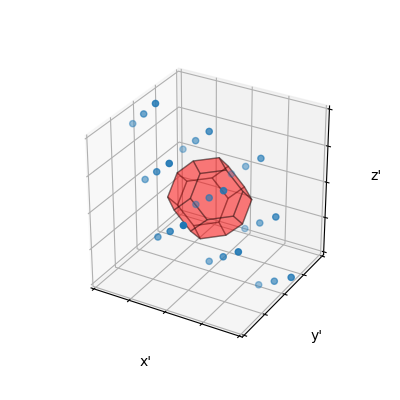

In [3]:
%matplotlib notebook
bz = lat.get_brillouin_zone()

#Display Brillouin Zone in reciprocal space:
rl.brilZone(bz, recip_lat)
